In [1]:
# interection with PolyA_DB2, PolyA_DB3
import os
os.getcwd()

title="pas_v5"

basePath="/data/jinwf/wangjl/apa/190705PAS/bed/";
pdfPath="/home/wangjl/data/apa/191111Figure/f2/validation/";
span=10

#db2
fdb2="/home/wangjl/data/apa/190610APA/02_validate/polyAsite.hs.db2.hg19.txt"
#db3
fdb3="/home/wangjl/data/apa/190610APA/02_validate/human.PAS.txt"

# 1. read data

In [2]:
# read my polyA site
import re
def getPASSet(fpath, ncol=0,nheader=0):
    fr=open(fpath,'r' )
    DB={};
    i=0
    j=0
    for lineR in fr.readlines():
        i+=1
        if i>10:
            #break;
            pass;
        #no header
        if nheader>(i-1):
            continue;
        
        line=lineR.strip()
        pas=re.split("[\s\t]",line)[ncol]
        arr=re.split(':',pas)
        
        chrStrand=arr[0]+':'+arr[2]
        pos=int(arr[1])
        
        # save to set
        if chrStrand not in DB:
            DB[chrStrand]=[];
        DB[chrStrand].append(pos) 
        j+=1
    fr.close()
    print("i=",i, '; j=',j)
    return DB;

fpath1="/data/jinwf/wangjl/apa/190705PAS/bed/pasPostions_Location_transcriptName-noChrM_noInnerPrime_PY-filterCountCell.bed"
pasMe=getPASSet(fpath1, nheader=1)

i= 20223 ; j= 20222


In [25]:
# read DB3
pasDB3=getPASSet(fdb3, ncol=0,nheader=1)

i= 311595 ; j= 311594


In [3]:
# read DB2
import re
def getPASSet2(fpath):
    fr=open(fpath,'r' )
    DB={};
    i=0
    j=0
    for lineR in fr.readlines():
        i+=1
        if i>100:
            #break;
            pass;
        
        line=lineR.strip()
        pas=re.split("\t",line)[0]
        arr=re.split(':',pas)
        
        chrStrand=arr[0]#+':'+arr[2]
        pos=int(arr[1])
        # save to set
        if chrStrand not in DB:
            DB[chrStrand]=[];
        DB[chrStrand].append(pos)
        j+=1
    fr.close()
    print("i=",i, '; j=',j)
    return DB;

pasDB2=getPASSet2(fdb2)

i= 54665 ; j= 54665


# 2. get size of each db

In [4]:
def getSize(db):
    i=0;
    for cs in db:
        for p in db[cs]:
            i+=1
    print(i)
    return i;
#
sizeMe=getSize(pasMe) #20222
sizeDB2=getSize(pasDB2) #54665
#sizeDB3=getSize(pasDB3) #311594

20222
54665


# 3. ven plot with polyA_DB2，distance=12(use in plot) or 24

In [28]:
span=12

In [11]:
# with DB2
import time
def getInterDB2(span):
    start=time.time()
    i=0; #total
    j=0; #interection
    setNotIn=[]
    
    for chrStrand in pasMe: 
        for pos in pasMe[chrStrand]:
            flag=False;
            i+=1
            if i>10:
                #break;
                pass;
            if i%30000==0: #process bar
                print('i=', i, '; j=',j,'; ', round(time.time()-start,2),'second(s) elapsed' )
            
            chrStrand2=re.split(':',chrStrand)[0]
            
            if chrStrand2 in pasDB2:
                for pos2 in pasDB2[chrStrand2]:
                    if abs(pos-pos2)<=span:
                        j+=1;
                        flag=True;
                        break; # once find a close pos in DB, then noxt pos from pasMe
                        
            # record not in DB2
            if(flag==False):
                setNotIn.append( chrStrand+":"+str(pos) )
                
    #
    print('i=', i, '; j=',j, round(j/i,2),'%; ', 100*round(time.time()-start,2),'second(s) elapsed'  )
    # i= 20222 ; j= 11681 0.58 %;  284.0 second(s) elapsed
    return (sizeMe-j,sizeDB2-j, j, setNotIn) # site number: me only, DB only, common
rs2=getInterDB2(12) #(126946, 30985, 23680)
rs2[0:3] #0.16 %;
#(8541, 42984, 11681)

i= 20222 ; j= 11681 0.58 %;  299.0 second(s) elapsed


(8541, 42984, 11681)

In [16]:
print( len(rs2[3]) ) #8541

fwNotInDB2=open('/data/jinwf/wangjl/apa/190705PAS/bed/NotInDB2.pasID', 'w')
i=0
for item in rs2[3]:
    i+=1
    if i>10:
        #break;
        pass;
    arr=item.split(':')
    arr2=arr[0]+":"+arr[2]+":"+arr[1]
    fwNotInDB2.write(arr2+"\n")
fwNotInDB2.close()
print(i)    

8541
8541


In [30]:
rs2_24=getInterDB2(24) #(122018, 26057, 28608)
rs2_24

i= 20222 ; j= 12924 0.64 %;  269.0 second(s) elapsed


(7298, 41741, 12924)

In [31]:
# plot DB2
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
plt.switch_backend('agg')

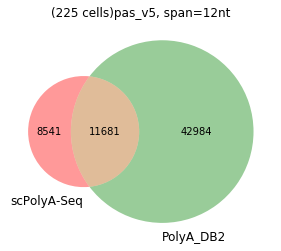

In [35]:
# within 12 nt as same site.
#plt.figure(figsize=(6,6))
venn2(subsets=rs2, set_labels=('scPolyA-Seq', 'PolyA_DB2'))
plt.title("(225 cells)"+title+", span="+str(span)+"nt")

plt.savefig('validation/Venn_with_polyA_DB2_'+title+'_span'+str(span)+'.png')

# 4. ven plot with polyA_DB3，distance=12(use in plot) or 24

In [33]:
# with DB3
import time
def getInterDB3(span):
    print('intersect with DB3, span=',span)
    start=time.time()
    i=0; #total
    j=0; #interection
    for chrStrand in pasMe:       
        for pos in pasMe[chrStrand]:
            i+=1
            if i>100:
                #break;
                pass;
            if i%30000==0: #process bar
                print('i=', i, '; j=',j,'; ', round(time.time()-start,2),'second(s) elapsed' )
            
            #chrStrand2=re.split(':',chrStrand)[0]
            chrStrand2=chrStrand
            
            if chrStrand2 in pasDB3:
                for pos2 in pasDB3[chrStrand2]:
                    if abs(pos-pos2)<=span:
                        j+=1;
                        break; # once find a close pos in DB, then noxt pos from pasMe
    #
    print('i=', i, '; j=',j, round(j/i,2),'%; ', 100*round(time.time()-start,2),'second(s) elapsed'  )
    return (sizeMe-j,sizeDB3-j, j ) # site number: me only, DB only, common
rs3=getInterDB3(12) #(105503, 266471, 45123)
rs3 #0.3 %

intersect with DB3, span= 12
i= 20222 ; j= 14029 0.69 %;  692.0 second(s) elapsed


(6193, 297565, 14029)

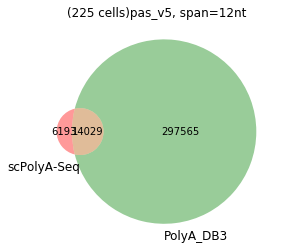

In [36]:
# within 12 nt as same site.
#plt.figure(figsize=(6,6))
venn2(subsets=rs3, set_labels=('scPolyA-Seq', 'PolyA_DB3'))
plt.title("(225 cells)"+title+", span="+str(span)+"nt")

plt.savefig('validation/Venn_with_polyA_DB3_'+title+'_span'+str(span)+'.png')